# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#capitalize the cities
cities = [c.title() for c in cities]
        
# Print the city count to confirm sufficient count
print (len(cities))


596


In [3]:
#display the list of cities
print (cities)

['Mar Del Plata', 'New Norfolk', 'Hobart', 'Geraldton', 'Albany', 'Puerto Carreno', 'Cape Town', 'Kropotkin', 'Hithadhoo', 'Klaksvik', 'Provideniya', 'Bambous Virieux', 'Tasiilaq', 'Clyde River', 'Ushuaia', 'Hermanus', 'Portland', 'Duz', 'Nikolskoye', 'Busselton', 'Qaanaaq', 'Sinop', 'Axim', 'Airai', 'Port Hardy', 'Half Moon Bay', 'Illoqqortoormiut', 'Vaitupu', 'Souillac', 'Vestmanna', 'Yellowknife', 'Rikitea', 'Katsuura', 'Marsh Harbour', 'Ciudad Bolivar', 'Avarua', 'Jamestown', 'Puerto Ayora', 'Bredasdorp', 'Mataura', 'Yunyang', 'Puerto Colombia', 'Saskylakh', 'Upernavik', 'Lefka', 'Mys Shmidta', 'Nola', 'Batagay', 'El Alto', 'We', 'Krasnoselkup', 'Kalachinsk', 'Muisne', 'Dikson', 'Tabory', 'Punta Arenas', 'Tezu', 'Saint-Philippe', 'Atar', 'Olinda', 'Attawapiskat', 'Sekoma', 'Cullinan', 'Hilo', 'Macusani', 'Svetlogorsk', 'Samusu', 'Burica', 'Lalomanu', 'Cherskiy', 'Ormara', 'Ambilobe', 'Umm Lajj', 'Cidreira', 'Nome', 'Itamarandiba', 'Ribeira Grande', 'Monrovia', 'Camopi', 'Novopokrov

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# url information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#create lists for the desired information
country=[]
lat = []
lon = []
temp = []
humidity = []
wind = []
cloud = []
date=[]


i=0
#request information from the api
for city in cities:
    response = requests.get(query_url + city).json()
    i=i+1
    try:
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        date.append(response['dt'])
        print(f"{city} Complete - {i} of {len(cities)}")
        time.sleep(1)
        
    except (KeyError, IndexError):
        print(f"Data Missing for {city}----skipping----{i} of {len(cities)}")
        country.append(None)
        lat.append(None)
        lon.append(None)
        temp.append(None)
        humidity.append(None)
        wind.append(None)
        cloud.append(None)
        date.append(None)

        
#track the number of calls and responses        
    if i == len(cities):
        print(f"*******API REQUEST Complete*******") 
    

Mar Del Plata Complete - 1 of 596
New Norfolk Complete - 2 of 596
Hobart Complete - 3 of 596
Geraldton Complete - 4 of 596
Albany Complete - 5 of 596
Puerto Carreno Complete - 6 of 596
Cape Town Complete - 7 of 596
Kropotkin Complete - 8 of 596
Hithadhoo Complete - 9 of 596
Klaksvik Complete - 10 of 596
Provideniya Complete - 11 of 596
Bambous Virieux Complete - 12 of 596
Tasiilaq Complete - 13 of 596
Clyde River Complete - 14 of 596
Ushuaia Complete - 15 of 596
Hermanus Complete - 16 of 596
Portland Complete - 17 of 596
Data Missing for Duz----skipping----18 of 596
Nikolskoye Complete - 19 of 596
Busselton Complete - 20 of 596
Qaanaaq Complete - 21 of 596
Sinop Complete - 22 of 596
Axim Complete - 23 of 596
Airai Complete - 24 of 596
Port Hardy Complete - 25 of 596
Half Moon Bay Complete - 26 of 596
Data Missing for Illoqqortoormiut----skipping----27 of 596
Data Missing for Vaitupu----skipping----28 of 596
Souillac Complete - 29 of 596
Vestmanna Complete - 30 of 596
Yellowknife Comple

The Pas Complete - 255 of 596
Kaeo Complete - 256 of 596
Kaitangata Complete - 257 of 596
Huarmey Complete - 258 of 596
San Jeronimo Complete - 259 of 596
Kodiak Complete - 260 of 596
Naryan-Mar Complete - 261 of 596
Meulaboh Complete - 262 of 596
Abhar Complete - 263 of 596
Boguchany Complete - 264 of 596
Mombetsu Complete - 265 of 596
Pevek Complete - 266 of 596
Marfino Complete - 267 of 596
Pangody Complete - 268 of 596
Bathsheba Complete - 269 of 596
Zimmi Complete - 270 of 596
Riyadh Complete - 271 of 596
Kharan Complete - 272 of 596
Muroto Complete - 273 of 596
Rexburg Complete - 274 of 596
Weyburn Complete - 275 of 596
Laguna Complete - 276 of 596
Chodavaram Complete - 277 of 596
Korla Complete - 278 of 596
Pasaje Complete - 279 of 596
Itarema Complete - 280 of 596
Atuona Complete - 281 of 596
Ishigaki Complete - 282 of 596
Evensk Complete - 283 of 596
Alappuzha Complete - 284 of 596
Asyut Complete - 285 of 596
Data Missing for Alotau----skipping----286 of 596
Sumenep Complete -

The Valley Complete - 511 of 596
Lompoc Complete - 512 of 596
Sao Jose Da Coroa Grande Complete - 513 of 596
Marrakesh Complete - 514 of 596
Freeport Complete - 515 of 596
Kiunga Complete - 516 of 596
Hastings Complete - 517 of 596
Bahia Blanca Complete - 518 of 596
Xinzhi Complete - 519 of 596
Srednekolymsk Complete - 520 of 596
Zhigansk Complete - 521 of 596
Mayo Complete - 522 of 596
Poplar Bluff Complete - 523 of 596
Data Missing for Kazalinsk----skipping----524 of 596
Mount Gambier Complete - 525 of 596
Yerbogachen Complete - 526 of 596
Saint George Complete - 527 of 596
Bougouni Complete - 528 of 596
Bubaque Complete - 529 of 596
Yenagoa Complete - 530 of 596
Saldanha Complete - 531 of 596
Kemijarvi Complete - 532 of 596
Zheleznodorozhnyy Complete - 533 of 596
Colombo Complete - 534 of 596
Arys Complete - 535 of 596
Lubumbashi Complete - 536 of 596
La Roda Complete - 537 of 596
Data Missing for Dinsor----skipping----538 of 596
Hirara Complete - 539 of 596
Xucheng Complete - 540 o

In [5]:
#create a dictionary from all the gathered lists
city_dict = {
    "City": cities,
    "Country": country,
    "Lat": lat,
    "Lon": lon,
    "Temp": temp,
    "Humidity": humidity,
    "Wind_Speed": wind,
    "Cloudiness": cloud,
    "Date (UTC)": date
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#create a dataframe from the dictionary
city_df = pd.DataFrame(city_dict)

city_df.head(30)

,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
0,Mar Del Plata,AR,-38.00,-57.56,69.24,94.0,13.87,75.0,1.583361e+09
1,New Norfolk,AU,-42.78,147.06,60.75,93.0,9.17,90.0,1.583361e+09
2,Hobart,AU,-42.88,147.33,60.44,93.0,10.29,75.0,1.583360e+09
3,Geraldton,AU,-28.77,114.60,64.40,63.0,6.93,33.0,1.583361e+09
4,Albany,US,42.60,-73.97,41.79,42.0,13.87,40.0,1.583361e+09
5,Puerto Carreno,CO,6.19,-67.49,100.40,29.0,9.17,0.0,1.583360e+09
6,Cape Town,ZA,-33.93,18.42,66.13,88.0,10.29,3.0,1.583361e+09
7,Kropotkin,RU,45.44,40.58,53.73,55.0,5.68,98.0,1.583361e+09
8,Hithadhoo,MV,-0.60,73.08,82.81,77.0,15.82,100.0,1.583361e+09
9,Klaksvik,FO,62.23,-6.59,37.40,74.0,6.93,0.0,1.583361e+09


In [7]:
#clean up the dataframe- verify datatypes
city_df.dtypes


City           object
Country        object
Lat           float64
Lon           float64
Temp          float64
Humidity      float64
Wind_Speed    float64
Cloudiness    float64
Date (UTC)    float64
dtype: object

In [8]:
#drop "na" values
city_df = city_df.dropna(how='any', axis=0)

#convert the unix timestamp
city_df['Date (UTC)'] = pd.to_datetime(city_df['Date (UTC)'],unit='s')

#verify number of complete data sets
print (f"{len(city_df.index)} complete sets of city data.")
city_df.head(30)

558 complete sets of city data.


,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
0,Mar Del Plata,AR,-38.00,-57.56,69.24,94.0,13.87,75.0,2020-03-04 22:22:19
1,New Norfolk,AU,-42.78,147.06,60.75,93.0,9.17,90.0,2020-03-04 22:22:20
2,Hobart,AU,-42.88,147.33,60.44,93.0,10.29,75.0,2020-03-04 22:20:18
3,Geraldton,AU,-28.77,114.60,64.40,63.0,6.93,33.0,2020-03-04 22:22:22
4,Albany,US,42.60,-73.97,41.79,42.0,13.87,40.0,2020-03-04 22:22:04
5,Puerto Carreno,CO,6.19,-67.49,100.40,29.0,9.17,0.0,2020-03-04 22:19:49
6,Cape Town,ZA,-33.93,18.42,66.13,88.0,10.29,3.0,2020-03-04 22:22:08
7,Kropotkin,RU,45.44,40.58,53.73,55.0,5.68,98.0,2020-03-04 22:22:27
8,Hithadhoo,MV,-0.60,73.08,82.81,77.0,15.82,100.0,2020-03-04 22:22:28
9,Klaksvik,FO,62.23,-6.59,37.40,74.0,6.93,0.0,2020-03-04 22:22:29


In [9]:
#export dataframe to csv with option to drop the index
city_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [19]:
today = date.today()
time = today.strftime("%d/%m/%Y")

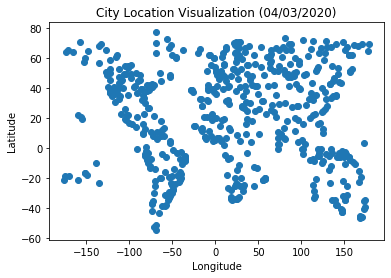

In [20]:
#plot to visualize the lat and lon of each city
plt.scatter(city_df["Lon"], city_df["Lat"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f"City Location Visualization ({time})")
plt.show()

#### Latitude vs. Temperature Plot

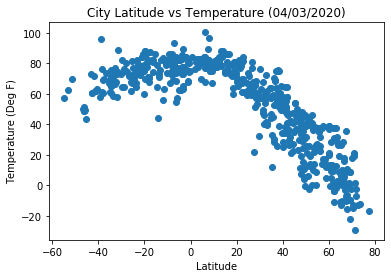

In [21]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Temp"])
plt.xlabel('Latitude')
plt.ylabel('Temperature (Deg F)')
plt.title(f"City Latitude vs Temperature ({time})")
plt.savefig('World_Latitude_vs_Temperature.png')
plt.show()

This plot shows that temperature decreases as you move further from the equator. The Southern Hemisphere is currently in summer, so the slop is not as high as the Northern Hemisphere.

#### Latitude vs. Humidity Plot

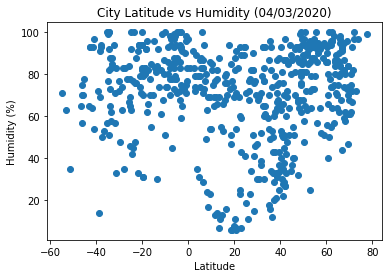

In [22]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({time})")
plt.savefig('World_Latitude_vs_Humidity.png')
plt.show()


There is no relationship between latitude and humidity.

#### Latitude vs. Cloudiness Plot

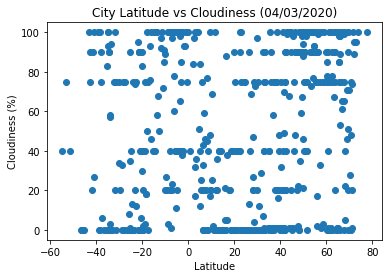

In [23]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({time})")
plt.savefig('World_Latitude_vs_Cloudiness.png')
plt.show()


There is no relationship between latitude and cloudiness.

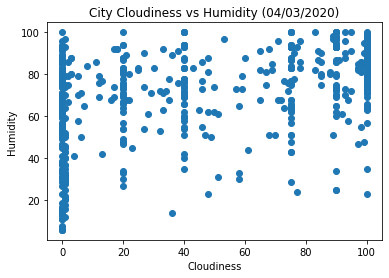

In [24]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Cloudiness"], city_df["Humidity"])
plt.xlabel('Cloudiness')
plt.ylabel('Humidity')
plt.title(f"City Cloudiness vs Humidity ({time})")
plt.savefig('World_Cloudiness_vs_Humidity.png')
plt.show()

#### Latitude vs. Wind Speed Plot

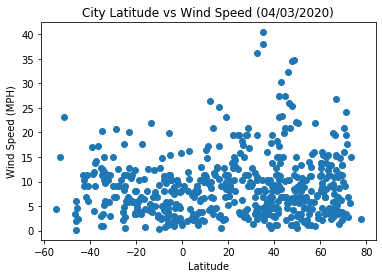

In [25]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Wind_Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f"City Latitude vs Wind Speed ({time})")
plt.savefig('World_Latitude_vs_Wind.png')
plt.show()


There is no relationship between wind speed and latitude.

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [27]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df[city_df["Lat"]>0]
north_df.head()

,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
4,Albany,US,42.60,-73.97,41.79,42.0,13.87,40.0,2020-03-04 22:22:04
5,Puerto Carreno,CO,6.19,-67.49,100.40,29.0,9.17,0.0,2020-03-04 22:19:49
7,Kropotkin,RU,45.44,40.58,53.73,55.0,5.68,98.0,2020-03-04 22:22:27
9,Klaksvik,FO,62.23,-6.59,37.40,74.0,6.93,0.0,2020-03-04 22:22:29
10,Provideniya,RU,64.38,-173.30,8.60,71.0,4.47,0.0,2020-03-04 22:22:30


In [28]:
south_df = city_df[city_df["Lat"]<0]
south_df.head()

,City,Country,Lat,Lon,Temp,Humidity,Wind_Speed,Cloudiness,Date (UTC)
0,Mar Del Plata,AR,-38.00,-57.56,69.24,94.0,13.87,75.0,2020-03-04 22:22:19
1,New Norfolk,AU,-42.78,147.06,60.75,93.0,9.17,90.0,2020-03-04 22:22:20
2,Hobart,AU,-42.88,147.33,60.44,93.0,10.29,75.0,2020-03-04 22:20:18
3,Geraldton,AU,-28.77,114.60,64.40,63.0,6.93,33.0,2020-03-04 22:22:22
6,Cape Town,ZA,-33.93,18.42,66.13,88.0,10.29,3.0,2020-03-04 22:22:08


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

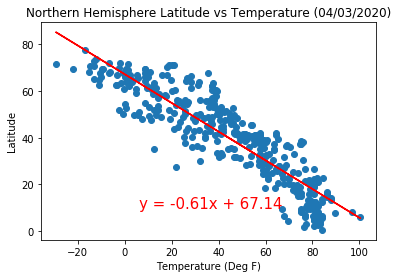

In [29]:
x_values = north_df["Temp"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature (Deg F)')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Temperature ({time})")
plt.savefig('North_Latitude_vs_Temperature.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

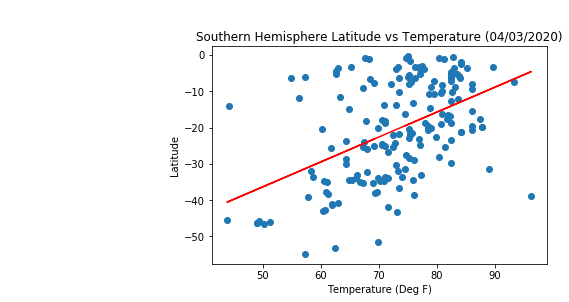

In [30]:
x_values = south_df["Temp"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature (Deg F)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Temperature ({time})")
plt.savefig('South_Latitude_vs_Tempature.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

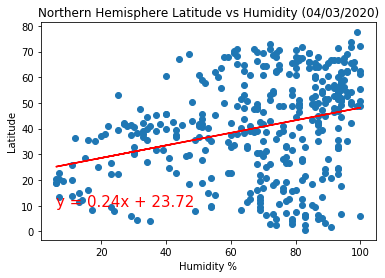

In [31]:
x_values = north_df["Humidity"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Humidity ({time})")
plt.savefig('North_Latitude_vs_Humidity.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

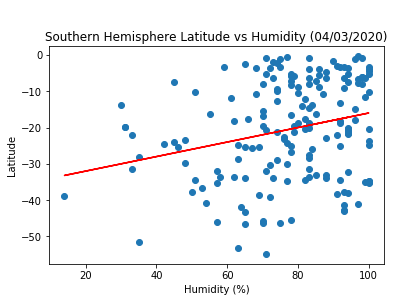

In [32]:
x_values = south_df["Humidity"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Humidity ({time})")
plt.savefig('South_Latitude_vs_Humidity.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

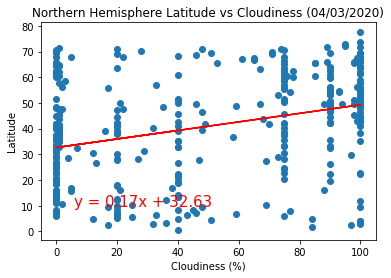

In [33]:
x_values = north_df["Cloudiness"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Cloudiness ({time})")
plt.savefig('North_Latitude_vs_Cloudiness.png')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

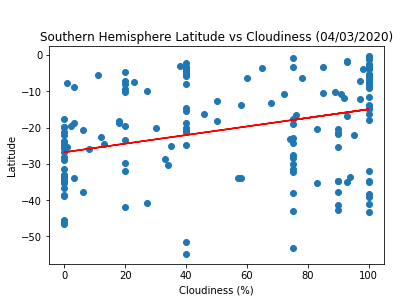

In [34]:
x_values = south_df["Cloudiness"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Cloudiness ({time})")
plt.savefig('South_Latitude_vs_Cloudiness.png')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

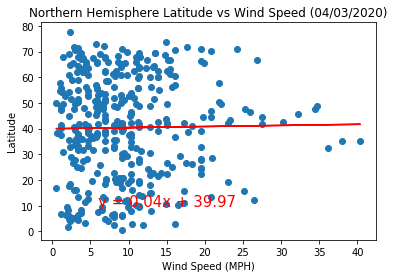

In [35]:
x_values = north_df["Wind_Speed"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title(f"Northern Hemisphere Latitude vs Wind Speed ({time})")
plt.savefig('North_Latitude_vs_Wind.png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

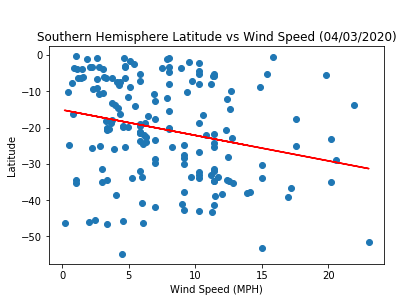

In [36]:
x_values = south_df["Wind_Speed"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.title(f"Southern Hemisphere Latitude vs Wind Speed ({time})")
plt.savefig('South_Latitude_vs_Wind.png')
plt.show()
